In [ ]:
#https://www.machinelearningplus.com/nlp/cosine-similarity/

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(0.0, 10.0)

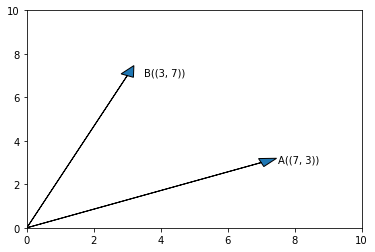

In [8]:
A = np.array([7,3])
B = np.array([3,7])
ax = plt.axes()
ax.arrow(0,0,A[0],A[1], head_width =0.4, head_length=0.5)
plt.annotate(f"A({A[0],A[1]})",xy=(A[0],A[1]), xytext=(A[0]+0.5, A[1]))

ax.arrow(0,0,B[0],B[1], head_width =0.4, head_length=0.5)
plt.annotate(f"B({B[0],B[1]})",xy=(B[0],B[1]), xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)
plt.ylim(0,10)

In [12]:
#Cosine Similarity
cos_sim = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print("Cosine Similarity is: ",cos_sim)

Cosine Similarity is:  0.7241379310344827


In [15]:
#Cosine Similarity using sklearn library
from sklearn.metrics.pairwise import cosine_similarity
A = np.array([7,3])
B = np.array([3,7])
cos_sim = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
print(cos_sim)

[[0.72413793]]


In [23]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"
doc_sai = "He is an AI Engineer"
doc = [doc_trump, doc_election, doc_putin, doc_sai]

In [28]:
#Step 1 Convert to vector
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
sparse_matrix = cv.fit_transform(doc)
cv.get_feature_names()

['ai',
 'career',
 'claimed',
 'earlier',
 'election',
 'elections',
 'engineer',
 'friend',
 'friends',
 'interference',
 'lost',
 'minister',
 'mr',
 'outcome',
 'parties',
 'political',
 'post',
 'president',
 'prime',
 'putin',
 'republican',
 'russia',
 'says',
 'served',
 'support',
 'trump',
 'vladimir',
 'winning',
 'witchhunt']

In [25]:
sparse_matrix.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0,
        0, 0, 1, 2, 0, 1, 0],
       [0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0,
        2, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1,
        0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [36]:
df = pd.DataFrame(sparse_matrix.toarray(), columns=cv.get_feature_names(), index = ['doc_trump', 'doc_election', 'doc_putin', 'doc_sai'])

In [37]:
df

,ai,career,claimed,earlier,election,elections,engineer,friend,friends,interference,...,putin,republican,russia,says,served,support,trump,vladimir,winning,witchhunt
doc_trump,0,0,0,0,1,0,0,0,2,0,...,1,1,0,0,0,1,2,0,1,0
doc_election,0,0,1,0,2,0,0,1,0,1,...,2,0,0,2,0,0,1,0,0,1
doc_putin,0,1,0,1,0,1,0,0,0,0,...,2,0,1,0,1,0,0,1,0,0
doc_sai,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(cosine_similarity(df,df))

[[1.         0.51639778 0.36893239 0.        ]
 [0.51639778 1.         0.45360921 0.        ]
 [0.36893239 0.45360921 1.         0.        ]
 [0.         0.         0.         1.        ]]
